In [2]:
import __init__
#
import pandas as pd
import numpy as np
import statsmodels.api as sm
from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline
#
def text_display(text, font_size):
    display(HTML('<font size=%d>' % font_size + text + '</font>'))

# Data loading and filtering

In [3]:
from community_analysis import regressionModel_dpath
df = pd.read_csv('%s/%s' % (regressionModel_dpath, 'fb/regressionModel-fb-2009-G(3).csv'))
df = df[(df['roamingTime'] <= 3600) & (df['roamingTime'] > 0*60)]
gn_drivers = set(df['did'])

## Attributes
* About time: month, day, timeFrame(hour)
* About zone: zi, zj
* Driver id
* Roaming time (duration of FREE state for each timeFrame and zone)
* Whether drivers pick up passengers or not

Note. The number of this group's drivers is 90

In [4]:
df

,month,day,timeFrame,zi,zj,groupName,did,roamingTime,39678,4956,...,4644,21848,4353,27348,19235,18627,4890,23635,28079,16906
0,1,21,23,52,28,G(3),36221,50,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,29,21,30,34,G(3),4890,50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,29,17,53,26,G(3),36221,50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,13,19,52,11,G(3),34942,154,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,16,60,16,G(3),34785,104,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,19,18,55,22,G(3),5178,49,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,28,19,36,33,G(3),21738,95,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,13,16,56,14,G(3),28079,72,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,7,18,40,22,G(3),17362,50,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,28,14,30,23,G(3),23582,100,0,0,...,0,0,0,0,0,0,0,0,0,0


## Start regression for a driver
* Choose a driver and fiter out instances which is not related to the driver
* Consider instances that the driver pick up passengers

In [5]:
did1 = 27348
other_dids = ['%d' % did0 for did0 in gn_drivers.difference(set([did1]))]
did1_df = df[(df['did'] == did1) & (df['%d' % did1] == 1)].copy(deep=True)
did1_df = did1_df[~(np.abs(did1_df['roamingTime'] - did1_df['roamingTime'].mean()) > ( 3 * did1_df['roamingTime'].std()))]

In [6]:
did1_df

,month,day,timeFrame,zi,zj,groupName,did,roamingTime,39678,4956,...,4644,21848,4353,27348,19235,18627,4890,23635,28079,16906
116,1,12,14,74,31,G(3),27348,40,0,0,...,0,0,0,1,0,0,0,0,0,0
800,1,19,19,56,11,G(3),27348,233,0,0,...,0,0,0,1,0,0,0,0,0,0
2317,1,19,21,56,12,G(3),27348,127,0,0,...,0,0,0,1,0,0,0,0,0,0
2611,1,27,17,72,30,G(3),27348,17,0,0,...,0,0,0,1,0,0,0,0,0,0
2947,1,7,15,56,12,G(3),27348,25,0,0,...,0,0,0,1,0,0,0,0,0,0
3073,1,22,16,22,22,G(3),27348,14,0,0,...,0,0,0,1,0,0,0,0,0,0
3103,1,7,17,56,12,G(3),27348,64,0,0,...,0,0,0,1,0,0,0,0,0,0
4024,1,5,17,53,18,G(3),27348,658,0,0,...,0,0,0,1,0,0,0,0,0,0
5559,1,12,19,54,10,G(3),27348,122,0,0,...,1,0,0,1,0,0,0,0,0,0
6811,1,19,14,34,16,G(3),27348,52,0,0,...,0,0,0,1,0,0,0,0,0,0


# Issue 1. Regression after fixing a combination (timeFrame, zone)
* Few instances for a combination
    * This is because of the small zone size (0.5 km X 0.5 km)
    * Can't do regression because # of instances are less than dependent variables (other drivers)
* A combination has few instances would be more meaningful regarding community analysis
    * The combination is hardly happend -> It is highly possible that other drivers communicated with the driver
    
* **Maybe, if consider more periods for example two year's dataset, we could control timeFrame and Zone**

In [7]:
tf_zone_num_instances = dict()
for tf, zi, zj in did1_df[['timeFrame', 'zi', 'zj']].values:
    k = (tf, zi, zj)
    if tf_zone_num_instances.has_key(k):
        continue
    tf_zone_df = did1_df[(did1_df['timeFrame'] == tf) 
                                    & (did1_df['zi'] == zi) 
                                    & (did1_df['zj'] == zj)]
    tf_zone_num_instances[k] = len(tf_zone_df)
num_instances = np.asarray(tf_zone_num_instances.values())
#
FONT_SIZE = 2
text_display('The total # of instances: %d' % (num_instances.sum()), FONT_SIZE)
text_display('# combination of timeFrame and zone: %d' % (len(tf_zone_num_instances)), FONT_SIZE)
num_combinations = {}
for v in tf_zone_num_instances.itervalues():
    if not num_combinations.has_key(v):
        num_combinations[v] = 0
    num_combinations[v] += 1
text_display('Distribution of # of instances for combinations (# of instance: # conminations)', FONT_SIZE)
print num_combinations
NUM_INSTANCE_CRITERIA = 2
text_display('# (Average, Min, Median, Max) for each timeFrame and zone', FONT_SIZE)
text_display('(%.2f, %d, %.2f, %d)' % \
             (num_instances.mean(), min(num_instances), 
              np.median(num_instances), max(num_instances)), FONT_SIZE)
text_display('# of the combination whose # of instances more than %d: %d' % \
                (NUM_INSTANCE_CRITERIA, len([v for v in tf_zone_num_instances.values() if v > NUM_INSTANCE_CRITERIA])), FONT_SIZE)    

{1: 463, 2: 70, 3: 26, 4: 10, 5: 3, 6: 2, 8: 2, 9: 1, 40: 1, 27: 1, 29: 2}


# Issue 2. Regression models
Note. Do regression withough fixing combinations

In [8]:
other_dids = ['%d' % did0 for did0 in gn_drivers.difference(set([did1]))]
did1_df = df[(df['did'] == did1) & (df['%d' % did1] == 1)].copy(deep=True)
did1_df = did1_df[~(np.abs(did1_df['roamingTime'] - did1_df['roamingTime'].mean()) > ( 3 * did1_df['roamingTime'].std()))]

## Issue 2.1 Single dependent variable (pairwise approach)
* So low r-squre
### Linear regression result

In [9]:
did0 = '39678'
y = did1_df['roamingTime']
X = did1_df[did0]
X = sm.add_constant(X)
res = sm.OLS(y, X).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:            roamingTime   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     43.22
Date:                Thu, 08 Dec 2016   Prob (F-statistic):           8.29e-11
Time:                        10:28:01   Log-Likelihood:                -5791.6
No. Observations:                 898   AIC:                         1.159e+04
Df Residuals:                     896   BIC:                         1.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.5105      5.229     23.619      0.0

### Chart

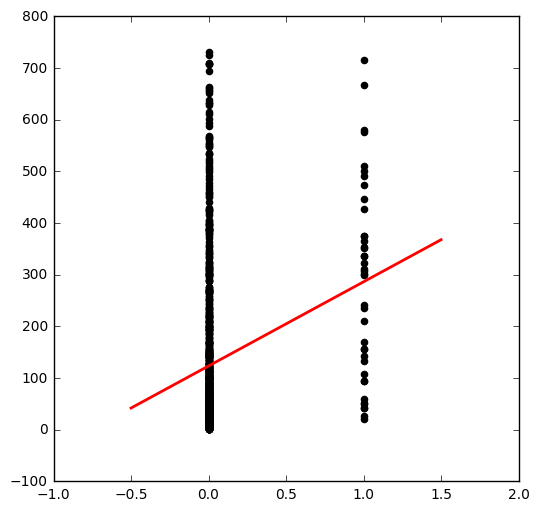

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(did1_df[did0], did1_df['roamingTime'], color='black')
x_values = [-0.5,0,1, 1.5]
y_estimation = [res.params[did0] * x  + res.params['const'] for x in x_values]
plt.plot(x_values, y_estimation, color='red', label="Regression line", linewidth=2)
plt.show()

## Issue 2.2 Multiple dependent variables
* Consider instances that any other driver pick up passengers
* The higher r-squre than single dependent variable model (because I consider more dependent variables
* There were some cases that coefficent is negative (why?)

In [16]:
other_dids = ['%d' % did0 for did0 in gn_drivers.difference(set([did1]))]
did1_df = df[(df['did'] == did1) & (df['%d' % did1] == 1)].copy(deep=True)
did1_df = did1_df[~(np.abs(did1_df['roamingTime'] - did1_df['roamingTime'].mean()) > ( 3 * did1_df['roamingTime'].std()))]
data_multi_reg = did1_df.drop(['month', 'day', 'timeFrame', 'zi', 'zj', 'groupName', 'did', '%d' % did1], axis=1) 
#
candi_dummies = []
for i, vs in enumerate(zip(*data_multi_reg.values)):
    if data_multi_reg.columns[i] == 'roamingTime':
        # It is roamingTime
        continue
    if sum(vs) != 0:
        candi_dummies.append(data_multi_reg.columns[i])
y = data_multi_reg['roamingTime']
X = data_multi_reg[candi_dummies]
X = sm.add_constant(X)
res = sm.OLS(y, X).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:            roamingTime   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     4.091
Date:                Thu, 08 Dec 2016   Prob (F-statistic):           1.82e-25
Time:                        10:29:03   Log-Likelihood:                -5659.7
No. Observations:                 898   AIC:                         1.148e+04
Df Residuals:                     816   BIC:                         1.188e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.6298      5.322     18.532      0.0

In [19]:
significant_drivers = set()
for did0, pv in res.pvalues.iteritems():
    if did0 == 'const':
        continue
    if pv < 0.05:
        print did0, res.params[did0]
        significant_drivers.add(did0)
negative_ef_drivers = set()
# for did0, cof in res.params.iteritems():
#     if did0 == 'const':
#         continue
#     if cof < 0:
#         negative_ef_drivers.add(did0)
print 'Significant effect drivers'
print significant_drivers.difference(negative_ef_drivers)


14018 74.8183247378
19273 63.982317448
15561 71.5657382053
37665 65.175596362
2938 123.036889648
5692 96.0302735179
3530 125.216286321
19458 -78.6327600824
34942 58.633533319
17362 75.5384363256
8436 86.8182171701
34785 130.093583321
14131 -130.462637852
Significant effect drivers
set(['37665', '2938', '8436', '34785', '14131', '14018', '19273', '5692', '3530', '17362', '15561', '19458', '34942'])


## Control timeFrame and Zone
* Low F-statistic score (the model is not valid)
* The input rank is higher than the number of observations (maybe related to Issue 1)


In [13]:
other_dids = ['%d' % did0 for did0 in gn_drivers.difference(set([did1]))]
did1_df = df[(df['did'] == did1) & (df['%d' % did1] == 1)].copy(deep=True)
did1_df = did1_df[~(np.abs(did1_df['roamingTime'] - did1_df['roamingTime'].mean()) > ( 3 * did1_df['roamingTime'].std()))]
data_multi_reg = did1_df.drop(['month', 'day', 'groupName', 'did', '%d' % did1], axis=1) 

tf_zone = set()
for tf, zi, zj in data_multi_reg[['timeFrame', 'zi', 'zj']].values:
    k = (tf, zi, zj)
    tf_zone.add(k)
    
for (tf0, zi0, zj0) in tf_zone:
    dich_v = '(%d,%d,%d)' % (tf0, zi0, zj0)
    vals = []
    for tf1, zi1, zj1 in data_multi_reg[['timeFrame', 'zi', 'zj']].values:
        vals.append(1 if '(%d,%d,%d)' % (tf1, zi1, zj1) == dich_v else 0)
    data_multi_reg[dich_v] = pd.Series(vals, index=data_multi_reg.index)    
        
data_multi_reg


,timeFrame,zi,zj,roamingTime,39678,4956,16443,35019,5390,30976,...,"(15,44,45)","(17,52,18)","(18,72,20)","(14,49,42)","(15,43,11)","(15,54,22)","(17,77,25)","(16,51,9)","(16,45,47)","(17,55,16)"
116,14,74,31,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800,19,56,11,233,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2317,21,56,12,127,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2611,17,72,30,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2947,15,56,12,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3073,16,22,22,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3103,17,56,12,64,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4024,17,53,18,658,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5559,19,54,10,122,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6811,14,34,16,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_multi_reg = data_multi_reg.drop(['timeFrame', 'zi', 'zj'], axis=1) 
candi_dummies = []
for i, vs in enumerate(zip(*data_multi_reg.values)):
    if data_multi_reg.columns[i] == 'roamingTime':
        # It is roamingTime
        continue
    if sum(vs) != 0:
        candi_dummies.append(data_multi_reg.columns[i])
y = data_multi_reg['roamingTime']
X = data_multi_reg[candi_dummies+['(%d,%d,%d)' % (tf0, zi0, zj0) for (tf0, zi0, zj0) in tf_zone]]
X = sm.add_constant(X)
res = sm.OLS(y, X).fit()
print res.summary()


                            OLS Regression Results                            
Dep. Variable:            roamingTime   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.125
Date:                Thu, 08 Dec 2016   Prob (F-statistic):              0.141
Time:                        10:28:10   Log-Likelihood:                -5173.5
No. Observations:                 898   AIC:                         1.167e+04
Df Residuals:                     236   BIC:                         1.485e+04
Df Model:                         661                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.924e+13   7.61e+13     -0.515      0.6

In [15]:
significant_drivers = set()
for did0, pv in res.pvalues.iteritems():
    if did0 == 'const':
        continue
    if did0.startswith('('):
        continue
    if pv < 0.05:
        significant_drivers.add(did0)
negative_ef_drivers = set()
# for did0, cof in res.params.iteritems():
#     if did0 == 'const':
#         continue
#     if did0.startswith('('):
#         continue
#     if cof < 0:
#         negative_ef_drivers.add(did0)
print 'Significant effect drivers'
print significant_drivers.difference(negative_ef_drivers)

Significant and possitve effect drivers
set(['26155', '2938', '14018', '21781', '5692', '34960', '4644', '19458'])
